In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate
%matplotlib inline
import os
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('C:/Users/Nikhil_Chamle/Desktop/HR/HR_Employee_Attrition_Data.csv')

In [3]:
df = data.copy()

In [4]:
df.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,...,1,80,3,12,3,2,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.isnull().sum()/ len(df) * 100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [8]:
int1 = []
obj1 = []

for i in df.columns:
    if df[i].dtypes == 'int64':
        int1.append(i)
    else:
        obj1.append(i)


In [9]:
int1

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [10]:
obj1

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [11]:
# checking uniques values for features

for idx, column in enumerate(df.columns):
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Column '{column}' (Index {idx}):")
        
        # Drop NaN values and calculate value counts
        value_counts = df[column].dropna().value_counts().to_dict()
        
        # Calculate the total values
        total_values = sum(value_counts.values())
        
        # Check if the number of unique values is less than or equal to 15
        if len(unique_values) <= 15:
            # Convert value counts dictionary to a list of lists
            value_counts_table = [[idx, value, count, f"{count / total_values:.2%}"] for value, count in value_counts.items()]
            
            # Print the table using tabulate
            print(tabulate(value_counts_table, headers=['Index', 'Value', 'Count', 'Percentage']))
            print(f"Total Values: {total_values}")
        else:
            print(f"Too many unique values ({len(unique_values)}). Skipping...")
        print()

Column 'Attrition' (Index 1):
  Index  Value      Count  Percentage
-------  -------  -------  ------------
      1  No          2466  83.88%
      1  Yes          474  16.12%
Total Values: 2940

Column 'BusinessTravel' (Index 2):
  Index  Value                Count  Percentage
-------  -----------------  -------  ------------
      2  Travel_Rarely         2086  70.95%
      2  Travel_Frequently      554  18.84%
      2  Non-Travel             300  10.20%
Total Values: 2940

Column 'Department' (Index 4):
  Index  Value                     Count  Percentage
-------  ----------------------  -------  ------------
      4  Research & Development     1922  65.37%
      4  Sales                       892  30.34%
      4  Human Resources             126  4.29%
Total Values: 2940

Column 'EducationField' (Index 7):
  Index  Value               Count  Percentage
-------  ----------------  -------  ------------
      7  Life Sciences        1212  41.22%
      7  Medical               928  31.5

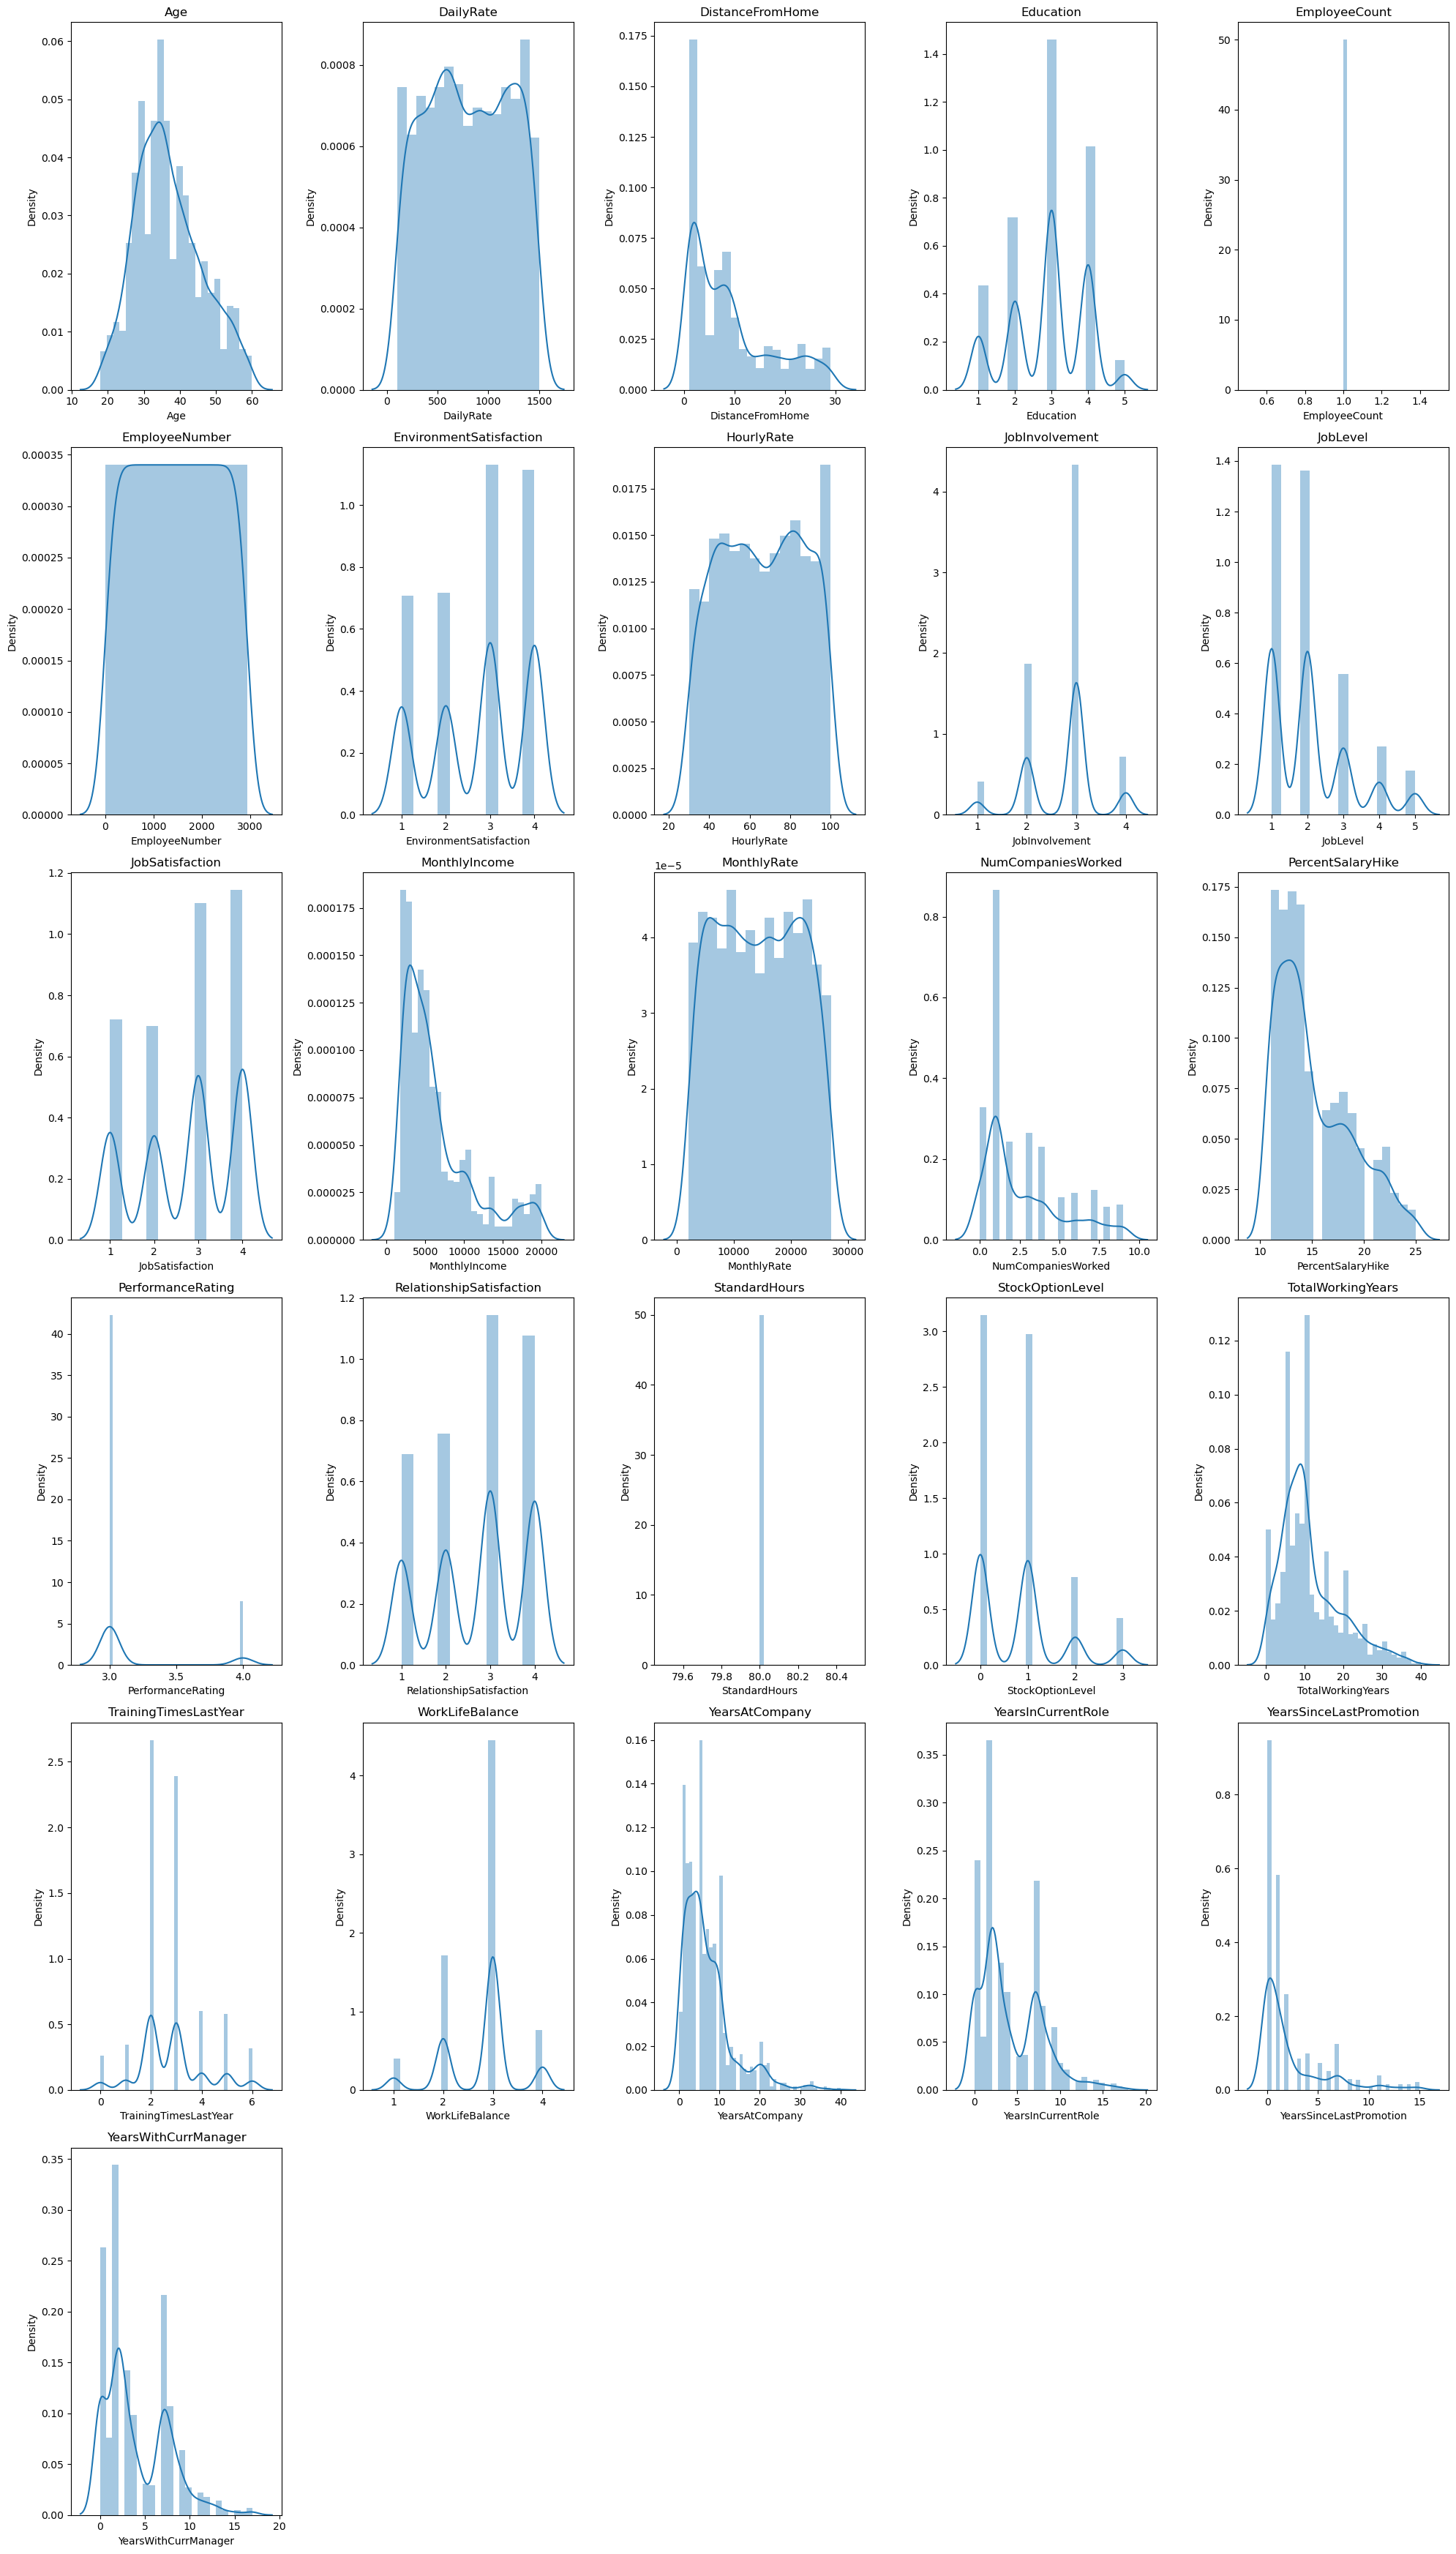

In [12]:
plt.figure(figsize=(20, 35))

for i in range(0, len(int1)):
    plt.subplot(6, 5, i + 1)
    sns.distplot(df[int1[i]])
    plt.title(int1[i])

plt.tight_layout()
plt.show()

No     2466
Yes     474
Name: Attrition, dtype: int64


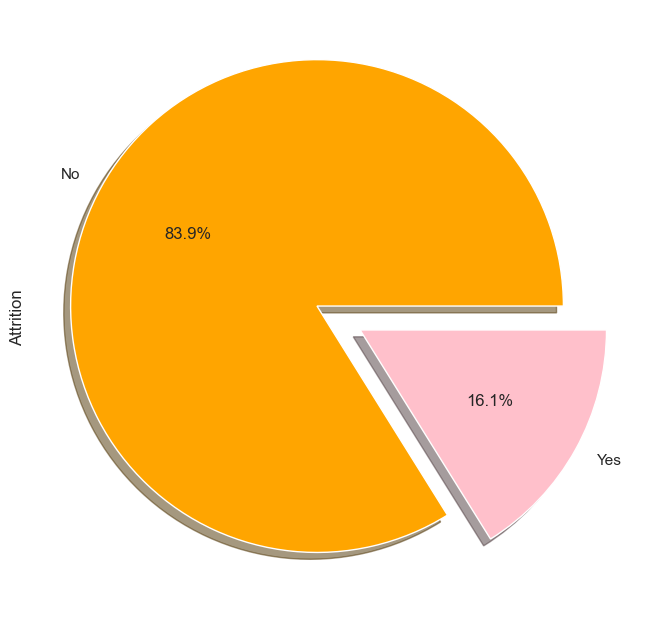

In [13]:
# Attrition piechart
plt.figure(figsize=(20,8))
sns.set(style='whitegrid')
df['Attrition'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['Orange','pink'])
print(df['Attrition'].value_counts())

In [14]:
percentage = (df["Attrition"].value_counts()['Yes']/df['Attrition'].count())*100
print("The percentage of people leaving the organization:",round(percentage,2),"%")

The percentage of people leaving the organization: 16.12 %


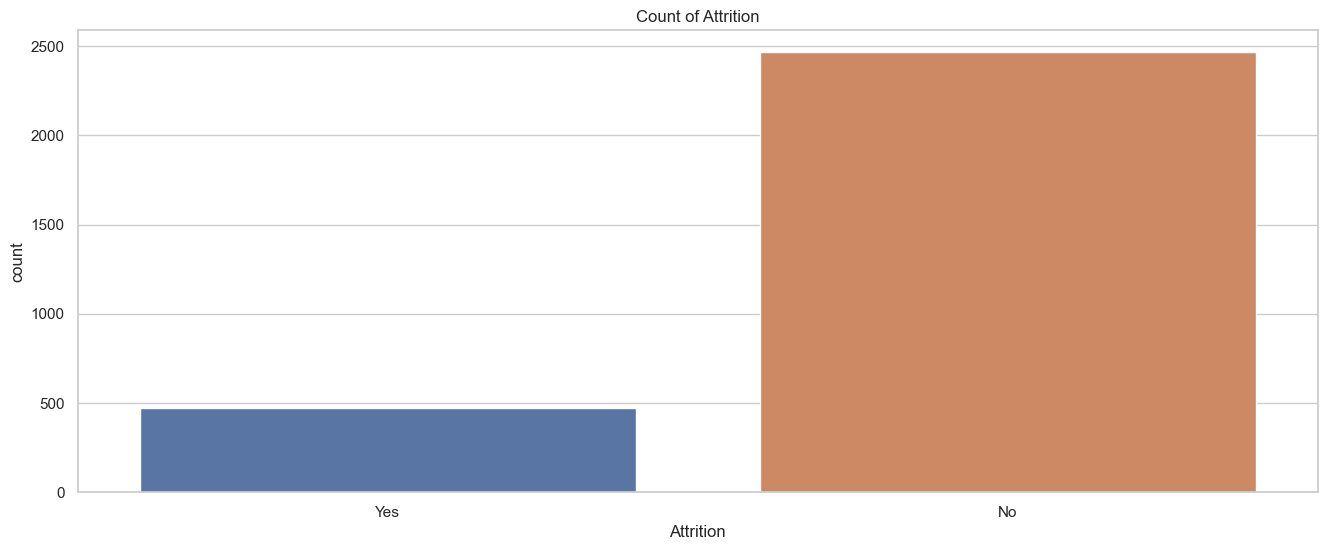

In [15]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Count of Attrition')
plt.show()

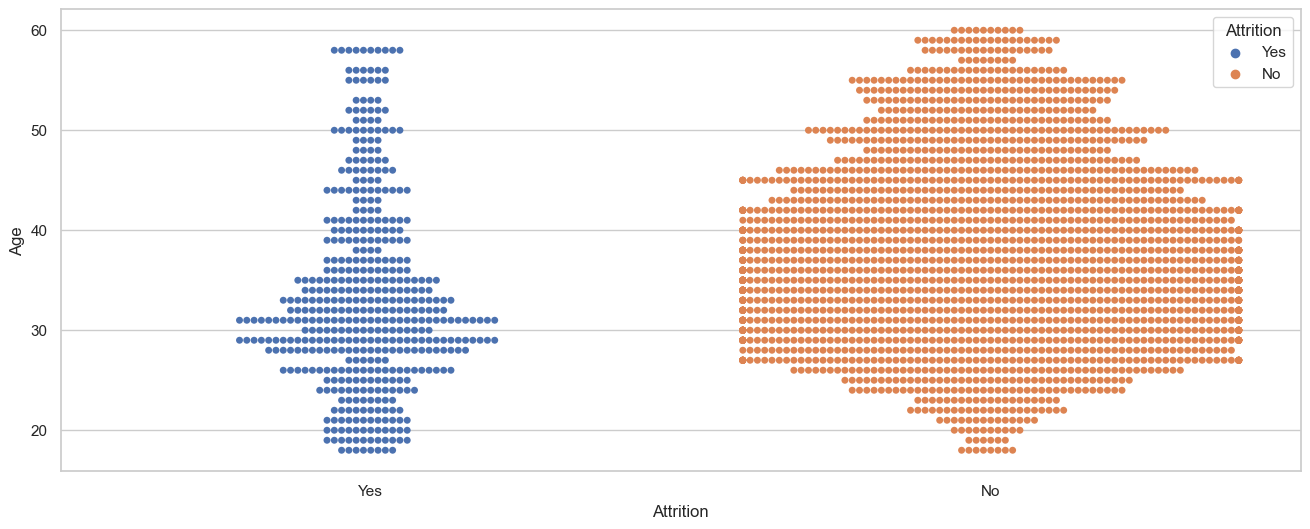

In [16]:
plt.figure(figsize = (16,6))
sns.swarmplot(y = 'Age', x = 'Attrition', data = df, hue = 'Attrition')
plt.show()

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64


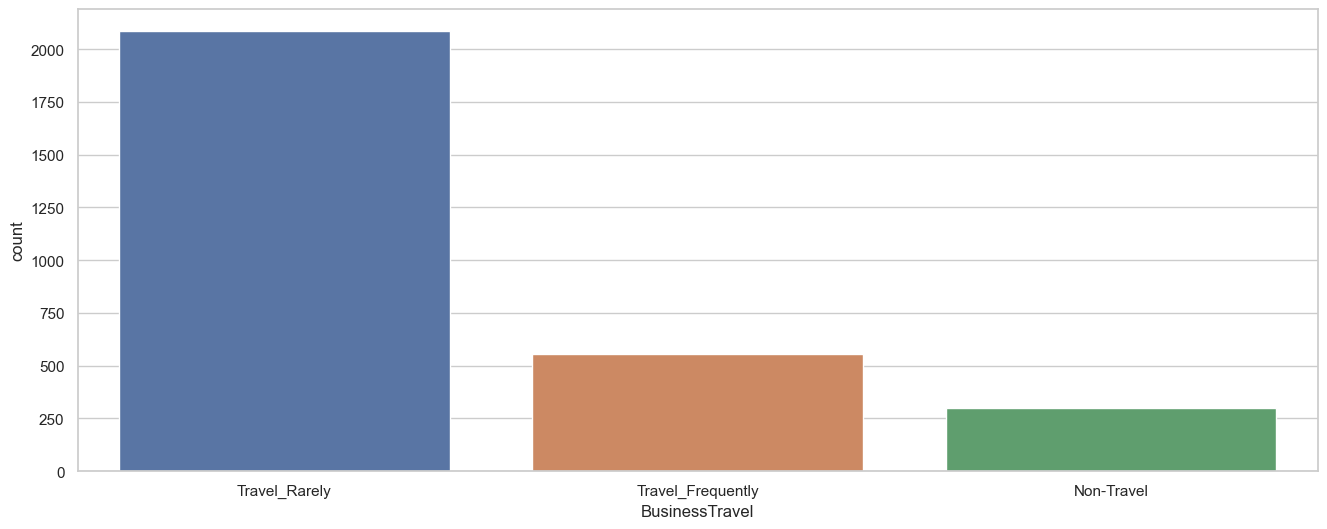

In [17]:
#Plotting the count by business travel
plt.figure(figsize = (16,6))
print(df['BusinessTravel'].value_counts())
sns.countplot(x= 'BusinessTravel', data = df)
plt.show()

In [18]:
#creating a new variable 'cat_BusinessTravel' . Converting into a categorical variable
#Travel_Rarely = 1
#Travel_Frequently = 2
#Non_Travel = 3
df.loc[df['BusinessTravel'] == 'Travel_Rarely','cat_BusinessTravel'] = 1
df.loc[df['BusinessTravel'] == 'Travel_Frequently','cat_BusinessTravel'] = 2
df.loc[df['BusinessTravel'] == 'Non-Travel','cat_BusinessTravel'] = 3
df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cat_BusinessTravel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,2.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,80,0,7,3,3,0,0,0,0,1.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,80,0,8,3,3,8,7,3,0,2.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,80,1,6,3,3,2,2,2,2,1.0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,...,80,0,8,2,2,7,7,3,6,2.0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,...,80,3,12,3,2,1,0,0,0,1.0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,...,80,1,1,2,3,1,0,0,0,1.0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,...,80,0,10,2,3,9,7,1,8,2.0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,...,80,2,17,3,2,7,7,7,7,1.0


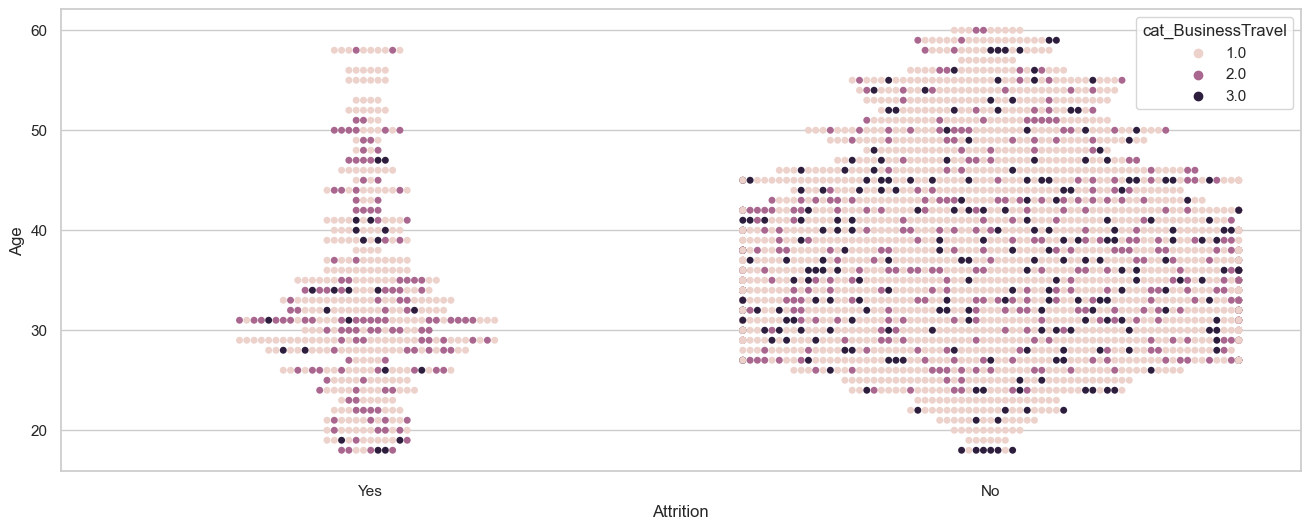

'From the below plot we can see that attrition is higher for employees in age bracket of [25-32].\nAlso, in this age group employees are travelling more'

In [19]:
#Plotting Attrition for Age and business travel
#Travel_Rarely = 1
#Travel_Frequently = 2
#Non_Travel = 3
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'Attrition', y='Age',  data = df, hue = 'cat_BusinessTravel')
plt.show()

#Insight 1
"""From the below plot we can see that attrition is higher for employees in age bracket of [25-32].
Also, in this age group employees are travelling more"""

In [20]:
#converting 'Department' data to ordinal variable
#Sales = 1
#Research and Development = 2
#Human Resorces = 3
df.loc[df['Department'] == 'Sales', 'ord_Department'] = 1
df.loc[df['Department'] == 'Research & Development', 'ord_Department'] = 2
df.loc[df['Department'] == 'Human Resources', 'ord_Department'] = 3

In [21]:
#Getting the count of Business travel based on Department
#HR
departmentgrp = df.groupby(by = 'Department')

df1 = departmentgrp.get_group('Human Resources')['BusinessTravel'].value_counts()
df1 = pd.DataFrame(df1)
df1 = df1.reset_index()
df1['Department'] = 'HR'
df1

,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR


In [22]:
#R&D
df2 = departmentgrp.get_group('Research & Development')['BusinessTravel'].value_counts()
df2 = df2.to_frame().reset_index()
df2['Department'] = 'R&D'
#df2.loc[df2['Department'] != 'HR', 'Department'] = 'R&D' 
df3 = df1.append(df2, ignore_index=True)
df3

,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR
3,Travel_Rarely,1364,R&D
4,Travel_Frequently,364,R&D
5,Non-Travel,194,R&D


In [23]:
df2 = departmentgrp.get_group('Sales')['BusinessTravel'].value_counts()
df2 = df2.to_frame().reset_index()
df2['Department'] = 'Sales'
df4 = df3.append(df2, ignore_index=True)
df4

,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR
3,Travel_Rarely,1364,R&D
4,Travel_Frequently,364,R&D
5,Non-Travel,194,R&D
6,Travel_Rarely,630,Sales
7,Travel_Frequently,168,Sales
8,Non-Travel,94,Sales


In [24]:
#Calculating % of frequent travel employees in Sales and R&D
print("% of frequent travel in Sales is::",(df4.loc[((df4['Department'] == 'Sales') & (df4['index'] == 'Travel_Frequently')),'BusinessTravel'].sum())/(df4.loc[df4['Department'] == 'Sales', 'BusinessTravel'].sum()))
print("% of frequent travel in R&D is ::",(df4.loc[((df4['Department'] == 'R&D') & (df4['index'] == 'Travel_Frequently')),'BusinessTravel'].sum())/(df4.loc[df4['Department'] == 'R&D', 'BusinessTravel'].sum()))

% of frequent travel in Sales is:: 0.18834080717488788
% of frequent travel in R&D is :: 0.18938605619146723


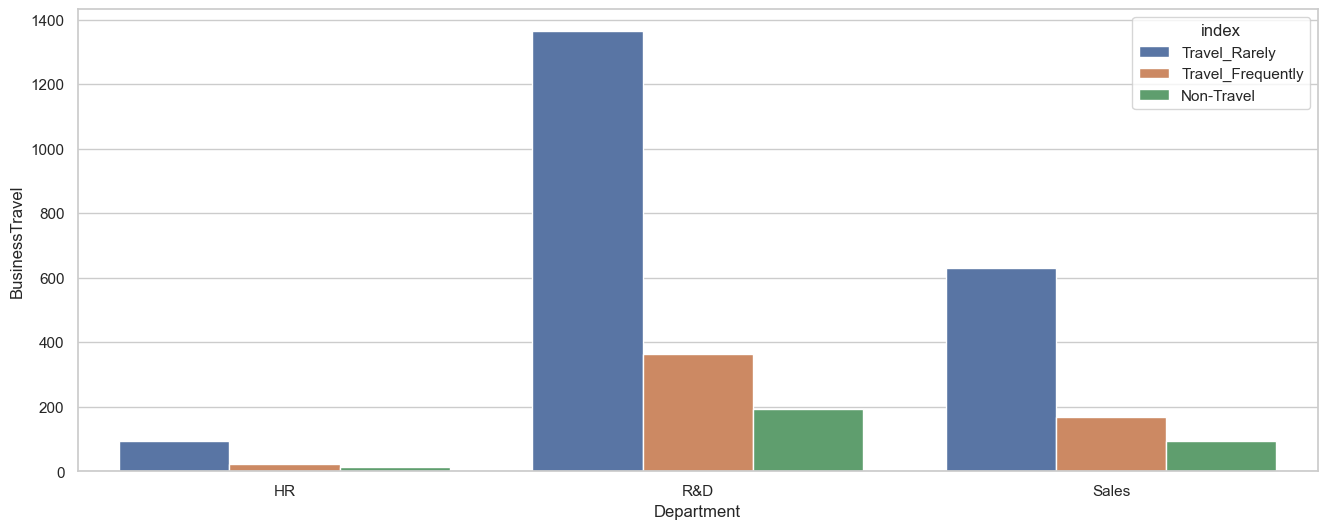

In [25]:
#plotting department data against travel
plt.figure(figsize = (16,6))
sns.barplot(x= 'Department', y = 'BusinessTravel' , data = df4, hue = 'index')
plt.show()

In [26]:
##Calculating attrition % for each department
#Sales
attrbysales = departmentgrp.get_group('Sales')['Attrition'].value_counts()
#HR
attrbyHR = departmentgrp.get_group('Human Resources')['Attrition'].value_counts()
#RnD
attrbyRnD = departmentgrp.get_group('Research & Development')['Attrition'].value_counts()
attrbydept = pd.DataFrame(columns = ['Department', 'Attrition'])
#attrbydept.reset_index(inplace = True)
attrbydept.loc[len(attrbydept)] = ["Sales", attrbysales['Yes']/(attrbysales.sum())*100]
attrbydept.loc[len(attrbydept)] = ["HR",(attrbyHR['Yes']/attrbyHR.sum())*100]
attrbydept.loc[len(attrbydept)] = ["R&D",(attrbyRnD['Yes']/attrbyRnD.sum())*100]
attrbydept

#Insight 2
"""Attrition is highest in Sales team closely followed by HR team"""

'Attrition is highest in Sales team closely followed by HR team'

In [27]:
print(attrbydept)

  Department  Attrition
0      Sales  20.627803
1         HR  19.047619
2        R&D  13.839750


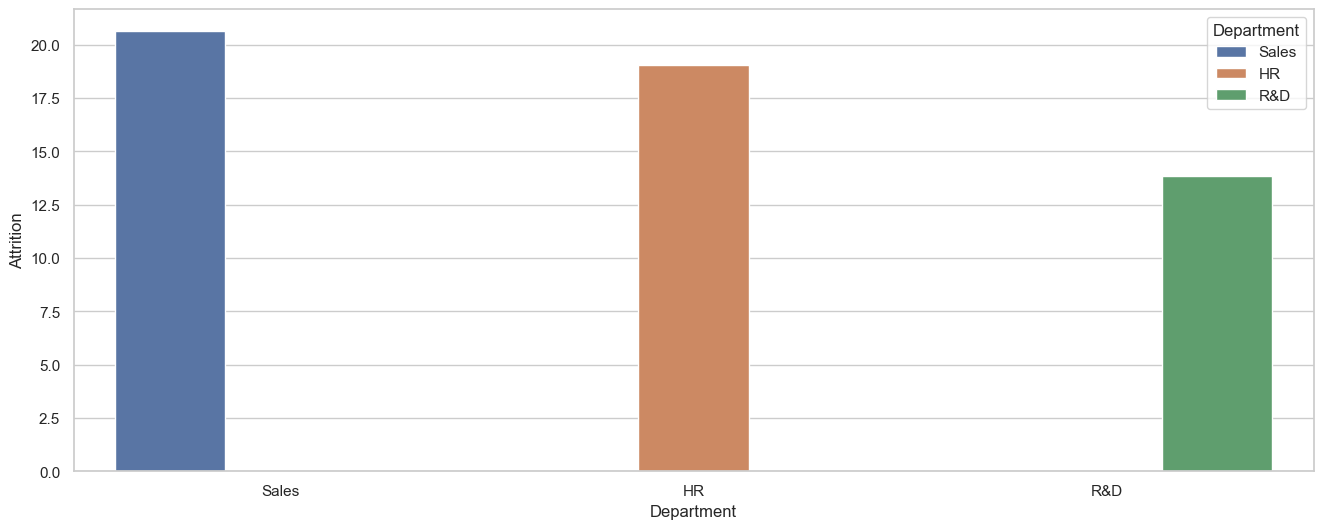

In [28]:
#Plotting Attrition% for each department
plt.figure(figsize = (16,6))
sns.barplot(x= 'Department', y = 'Attrition' , data = attrbydept, hue = 'Department')
plt.show()

In [29]:
##Calculating attrition vs EnvironmentSatisfaction level
envsatisfcationgrp = df.groupby(['EnvironmentSatisfaction','Attrition'])
envsatisfcationgrp.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [30]:
count = envsatisfcationgrp.get_group((1, 'Yes'))['EnvironmentSatisfaction'].count()
count
AttrperEnvSat = pd.DataFrame(columns = ['EnvironmentSatisfaction', 'Attrition', 'Count'])
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['1', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144


In [31]:
count = envsatisfcationgrp.get_group((2, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['2', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86


In [32]:
count = envsatisfcationgrp.get_group((3, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['3', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86
2,3,Yes,124


In [33]:
count = envsatisfcationgrp.get_group((4, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['4', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86
2,3,Yes,124
3,4,Yes,120


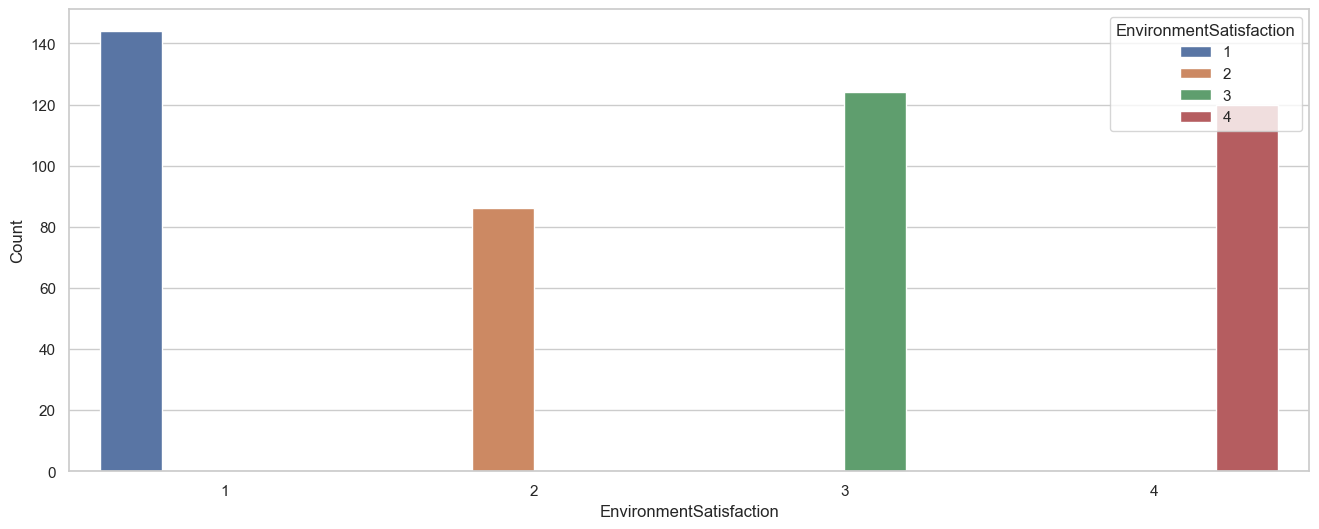

"Attrition is highest for group that has EnvironmentSatisfaction of '1', but for level '3' and '4' its high as well."

In [34]:
#Plotting Attrition vs Environmentsatisfaction
plt.figure(figsize = (16,6))
sns.barplot(x= 'EnvironmentSatisfaction', y = 'Count' , data = AttrperEnvSat, hue = 'EnvironmentSatisfaction')
plt.show()

#Insight3
"""Attrition is highest for group that has EnvironmentSatisfaction of '1', but for level '3' and '4' its high as well."""

In [35]:
#Attrition by gender
AttrGender = df.groupby(['Attrition', 'Gender'])
AttrGender.groups.keys()

dict_keys([('No', 'Female'), ('No', 'Male'), ('Yes', 'Female'), ('Yes', 'Male')])

In [36]:
AttrperGend = pd.DataFrame(columns = ['Gender', 'Attrition', 'Count'])
AttrperGend

,Gender,Attrition,Count


In [37]:
count = AttrGender.get_group(('Yes', 'Female'))['Attrition'].count()
AttrperGend.loc[len(AttrperGend)] = ['Female', 'Yes', count]
AttrperGend

,Gender,Attrition,Count
0,Female,Yes,174


In [38]:
count = AttrGender.get_group(('Yes', 'Male'))['Attrition'].count()
AttrperGend.loc[len(AttrperGend)] = ['Male', 'Yes', count]
AttrperGend

,Gender,Attrition,Count
0,Female,Yes,174
1,Male,Yes,300


In [39]:
df['Gender'].value_counts()
#plt.figure(figsize = (16,6))
#sns.barplot(x= 'Gender', y = 'Count' , data = AttrperGend, hue = 'Gender')

Male      1764
Female    1176
Name: Gender, dtype: int64

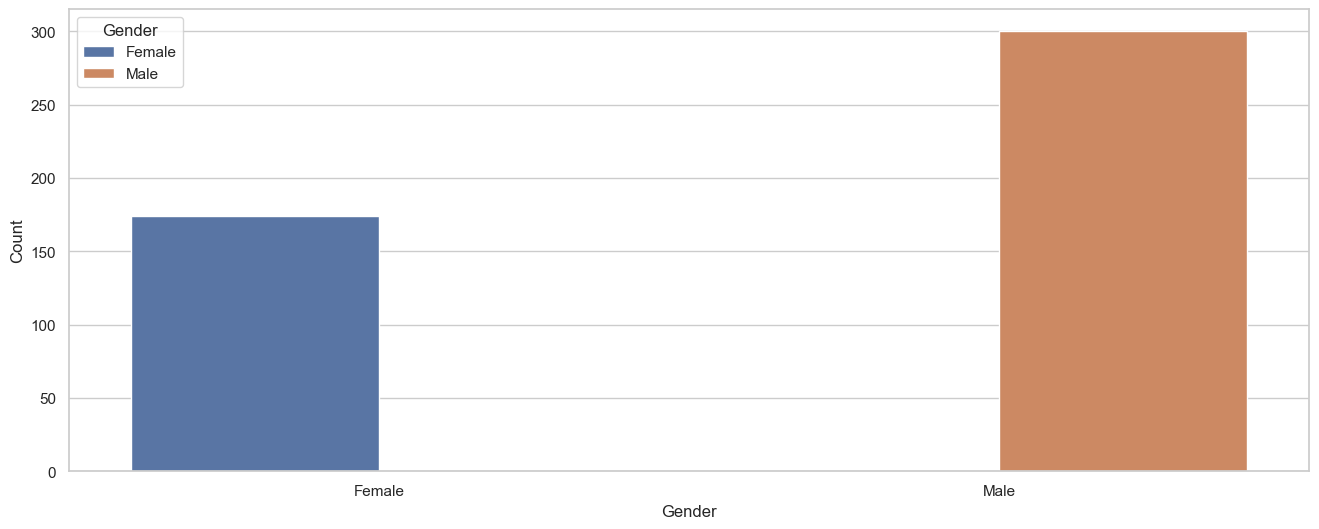

"Out of total people who have left, Male's have higher attrition numbers"

In [40]:
#Plotting Attrition vs Gender
plt.figure(figsize = (16,6))
sns.barplot(x= 'Gender', y = 'Count' , data = AttrperGend, hue = 'Gender')
plt.show()

#Insight 4
"""Out of total people who have left, Male's have higher attrition numbers"""

In [41]:
#Attrition by job level

In [42]:
attrbyJoblvl = df.groupby(['JobLevel', 'Attrition'])
attrbyJoblvl.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes'), (5, 'No'), (5, 'Yes')])

In [43]:
count = attrbyJoblvl.get_group((1, 'Yes'))['Attrition'].count() 
count

286

In [44]:
attrvsJoblvl = pd.DataFrame(columns = ['JobLevel', 'Attrition', 'count', 'Attr%'])
attrvsJoblvl

,JobLevel,Attrition,count,Attr%


In [45]:
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['1', 'Yes', count, (count/df['JobLevel'].value_counts()[1])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175


In [46]:
count = attrbyJoblvl.get_group((2, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['2', 'Yes', count, (count/df['JobLevel'].value_counts()[2])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828


In [47]:
count = attrbyJoblvl.get_group((3, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['3', 'Yes', count, (count/df['JobLevel'].value_counts()[3])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899


In [48]:
count = attrbyJoblvl.get_group((4, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['4', 'Yes', count, (count/df['JobLevel'].value_counts()[4])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899
3,4,Yes,10,4.716981


In [49]:
count = attrbyJoblvl.get_group((5, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['5', 'Yes', count, (count/df['JobLevel'].value_counts()[5])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899
3,4,Yes,10,4.716981
4,5,Yes,10,7.246377


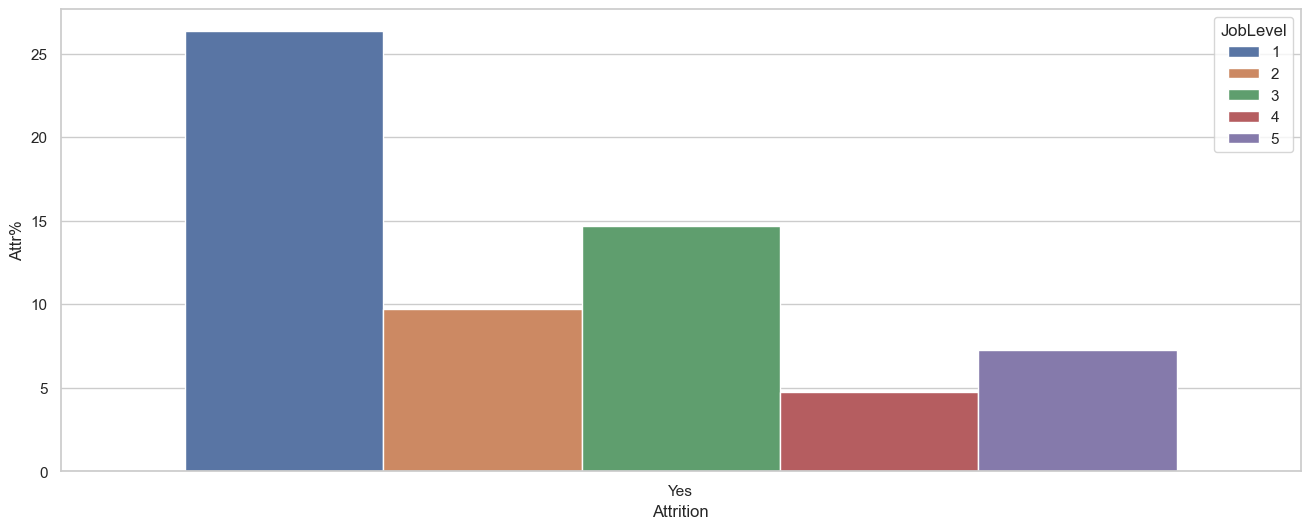

'Attrition % is highest in Job level 1, followed by job level 3'

In [50]:
#Plotting Attrition vs Job Level
plt.figure(figsize = (16,6))
sns.barplot(x= 'Attrition', y = 'Attr%' , data = attrvsJoblvl, hue = 'JobLevel')
plt.show()

#Insight 5
"""Attrition % is highest in Job level 1, followed by job level 3"""

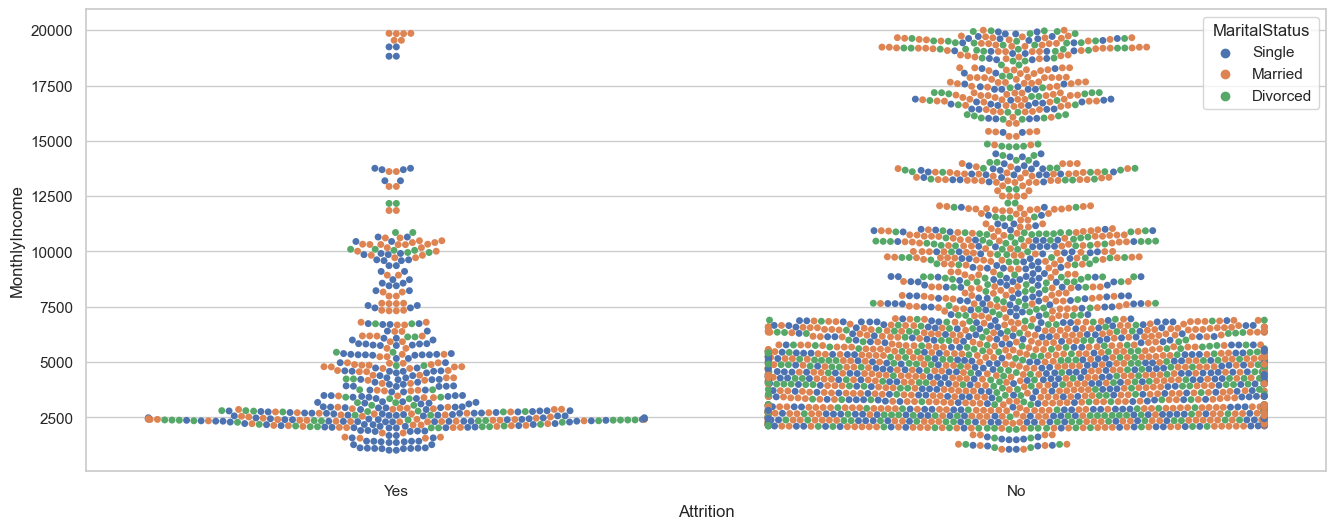

'Attrition is highest amount employees who are earning between (2500-5000)'

In [51]:
#Plotting Attrition vs monthly income
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'Attrition', y = 'MonthlyIncome' , data = df, hue= 'MaritalStatus')
plt.show()

#Insight 6
"""Attrition is highest amount employees who are earning between (2500-5000)"""

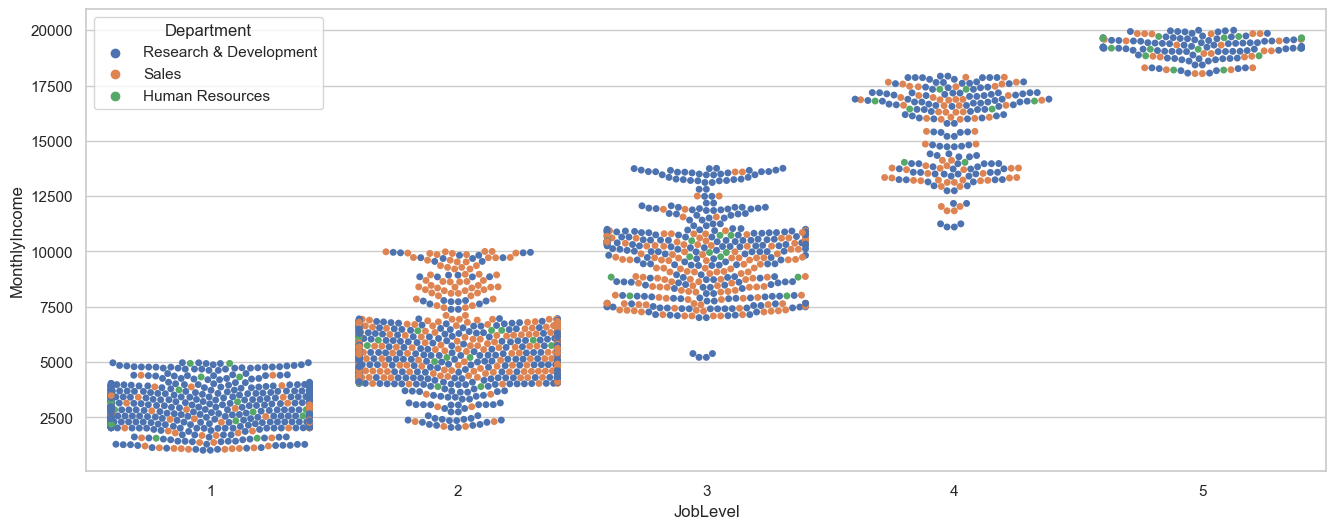

In [52]:
#Plotting Joblevel vs monthly income
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'JobLevel', y = 'MonthlyIncome' , data = df, hue= 'Department')
plt.show()

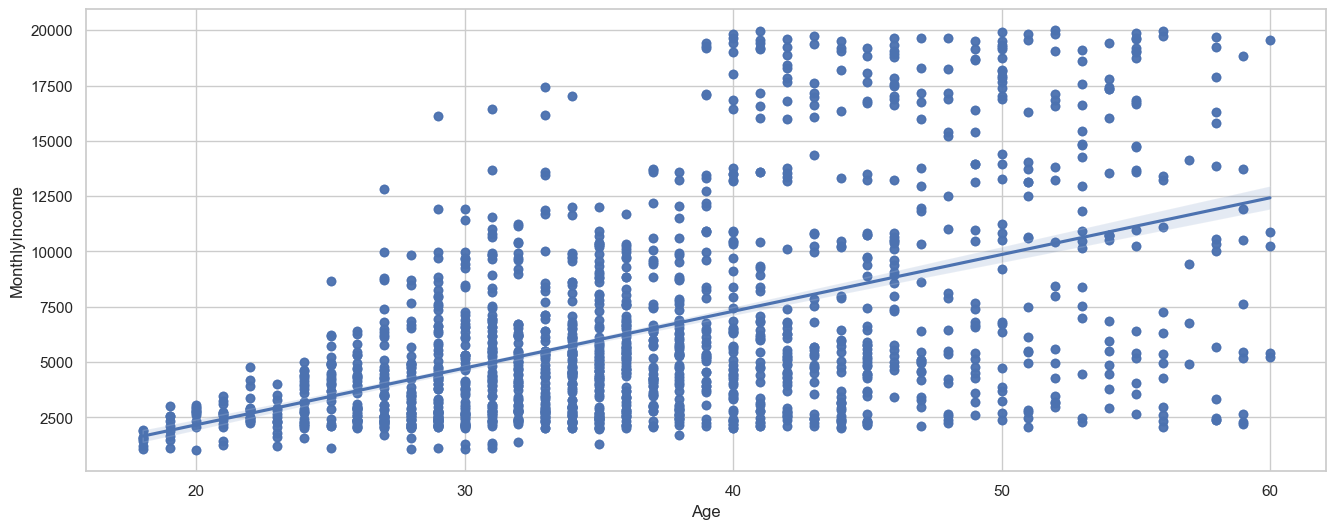

'There is a linear relation between Age and Monthly income'

In [53]:
#Plotting Age vs monthly income
plt.figure(figsize = (16,6))
sns.regplot(x= 'Age', y = 'MonthlyIncome' , data = df)
plt.show()

#Insight 7
"""There is a linear relation between Age and Monthly income"""

In [54]:
#Analyzing salary hike
df['PercentSalaryHike'].describe()

count    2940.000000
mean       15.209524
std         3.659315
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

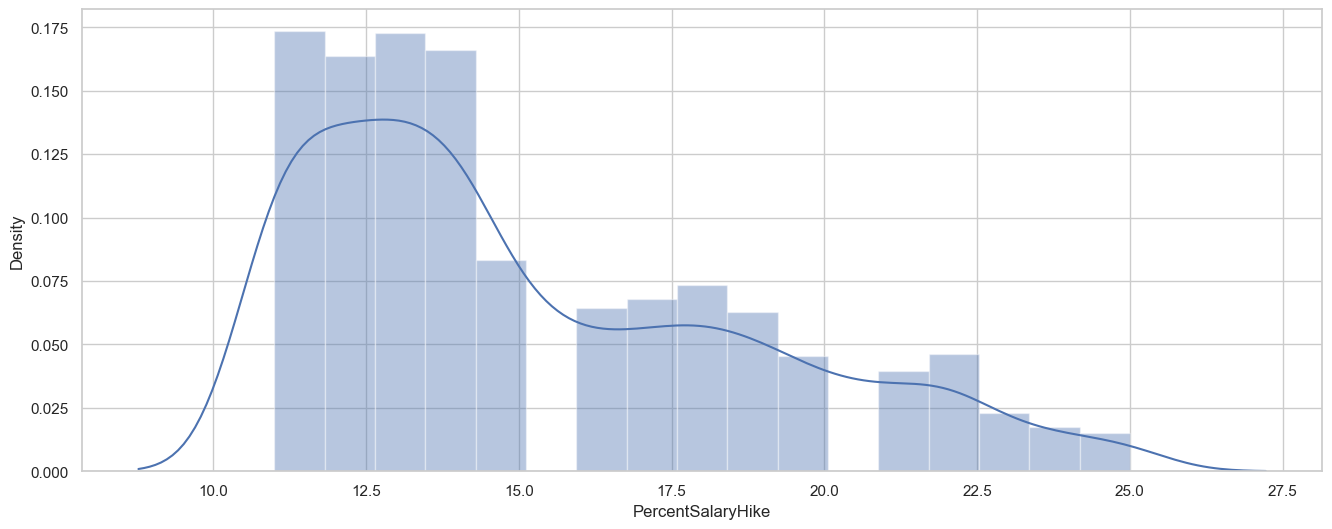

'The salary hike histogram is skewed to the right'

In [55]:
#Plotting histogram of Hike%
plt.figure(figsize = (16,6))
sns.distplot(df['PercentSalaryHike'], kde = True)
plt.show()

#Insight 8
"""The salary hike histogram is skewed to the right""" 

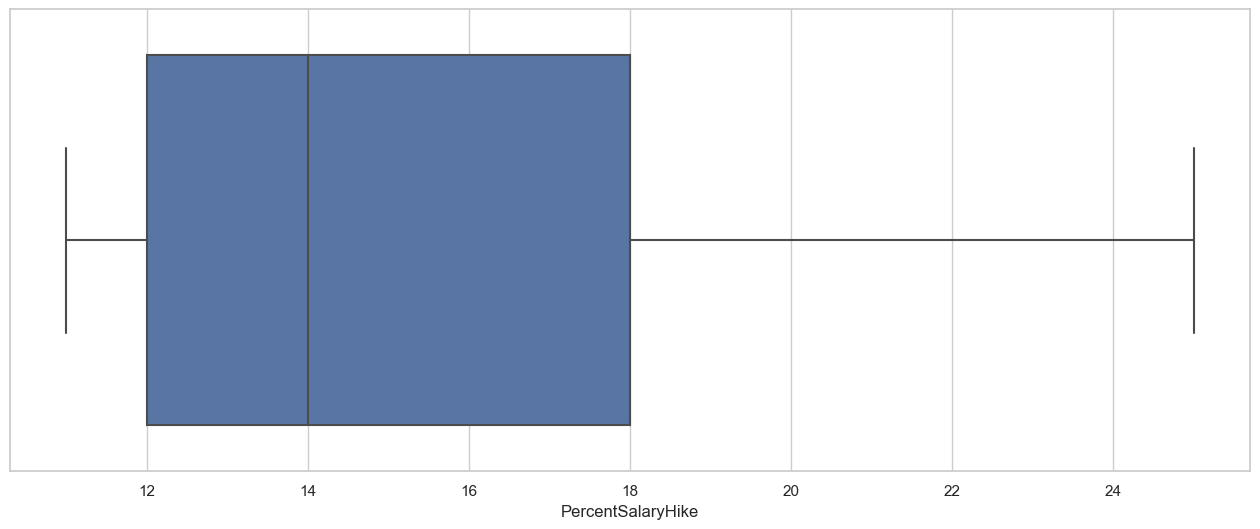

'The median salary hike is 14% and the mean is 15%. The highest salary hike given is 25%'

In [56]:
#Plotting box plot for salary hike
plt.figure(figsize = (16,6))
sns.boxplot(x = 'PercentSalaryHike', data = df)
plt.show()

#Insight 8
"""The median salary hike is 14% and the mean is 15%. The highest salary hike given is 25%""" 

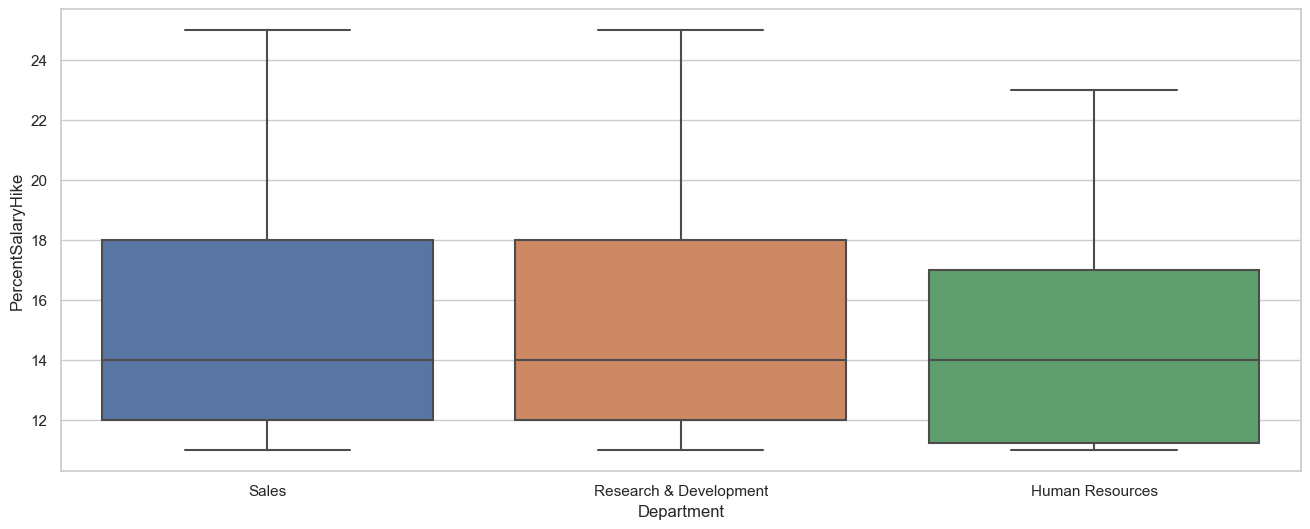

In [57]:
#Plotting hike% for each department
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'Department', data = df)
plt.show()

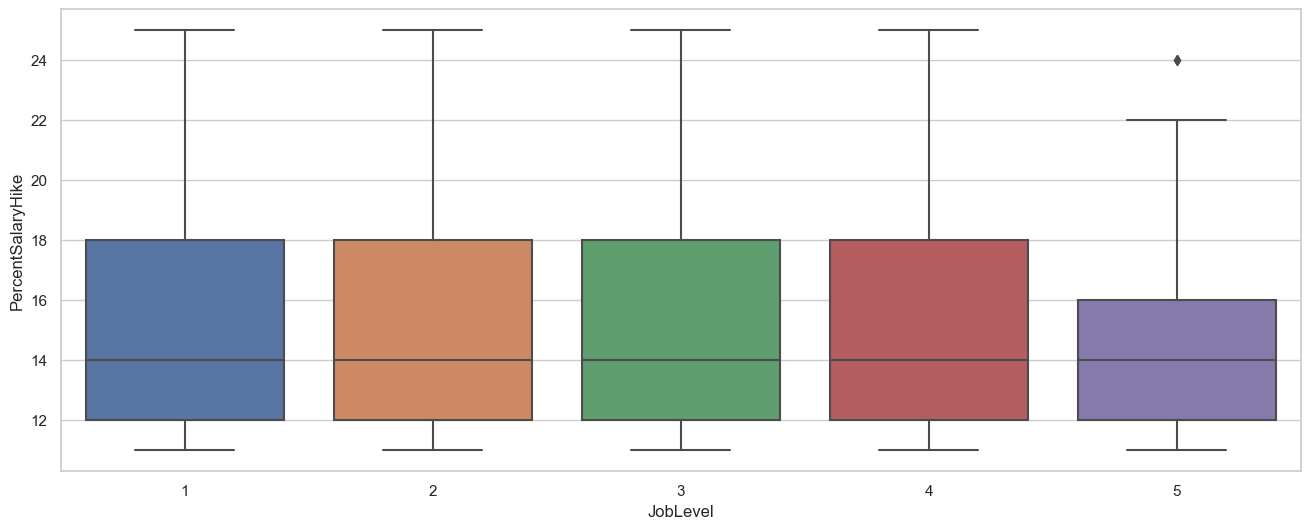

In [58]:
#Plotting hike% for each job level
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'JobLevel', data = df)
plt.show()

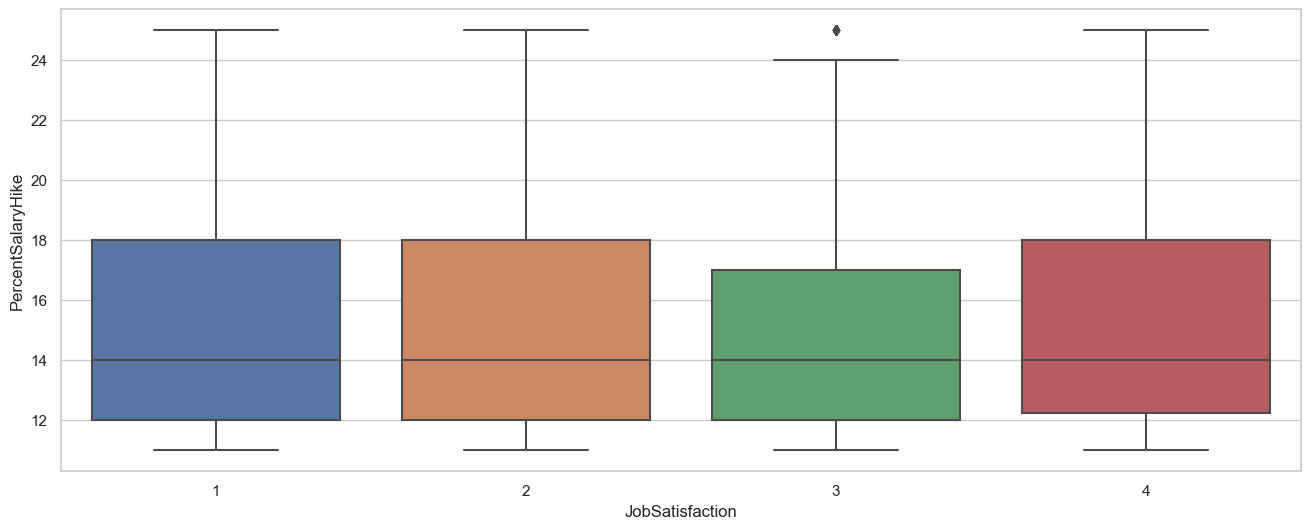

In [59]:
#Plotting hike% for each job satisfaction level
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'JobSatisfaction', data = df)
plt.show()

In [60]:
grp2 = df.groupby(['JobSatisfaction', 'Attrition'])
grp2.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [61]:
count = grp2.get_group((1, 'Yes'))['Attrition'].count()
count

132

In [62]:
attrbyJobsat = pd.DataFrame(columns = ['Jobsat','Attrition','Count', 'Attr%'])
attrbyJobsat.loc[len(attrbyJobsat)] = ['1', 'Yes', count, count/df['JobSatisfaction'].value_counts()[1]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.83737


In [63]:
count = grp2.get_group((2, 'Yes'))['Attrition'].count()
attrbyJobsat.loc[len(attrbyJobsat)] = ['2', 'Yes', count, count/df['JobSatisfaction'].value_counts()[2]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.837370
1,2,Yes,92,16.428571


In [64]:
count = grp2.get_group((3, 'Yes'))['Attrition'].count()
attrbyJobsat.loc[len(attrbyJobsat)] = ['3', 'Yes', count, count/df['JobSatisfaction'].value_counts()[3]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.837370
1,2,Yes,92,16.428571
2,3,Yes,146,16.515837


In [65]:
count = grp2.get_group((4, 'Yes'))['Attrition'].count()
attrbyJobsat.loc[len(attrbyJobsat)] = ['4', 'Yes', count, count/df['JobSatisfaction'].value_counts()[4]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.837370
1,2,Yes,92,16.428571
2,3,Yes,146,16.515837
3,4,Yes,104,11.328976


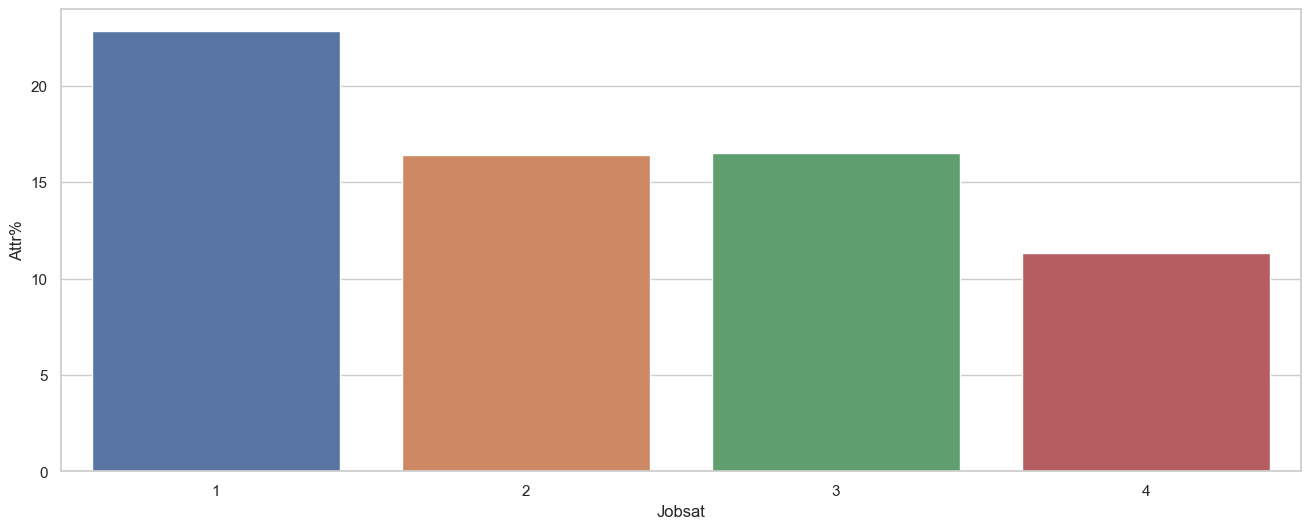

'employees with job satisfaction level of 1 have the highest attrition % of 22.8%'

In [66]:
#Plotting Attr% for Job satisfaction level
plt.figure(figsize = (16,6))
sns.barplot(y = 'Attr%', x = 'Jobsat', data = attrbyJobsat)
plt.show()

#Insight 9
"""employees with job satisfaction level of 1 have the highest attrition % of 22.8%""" 

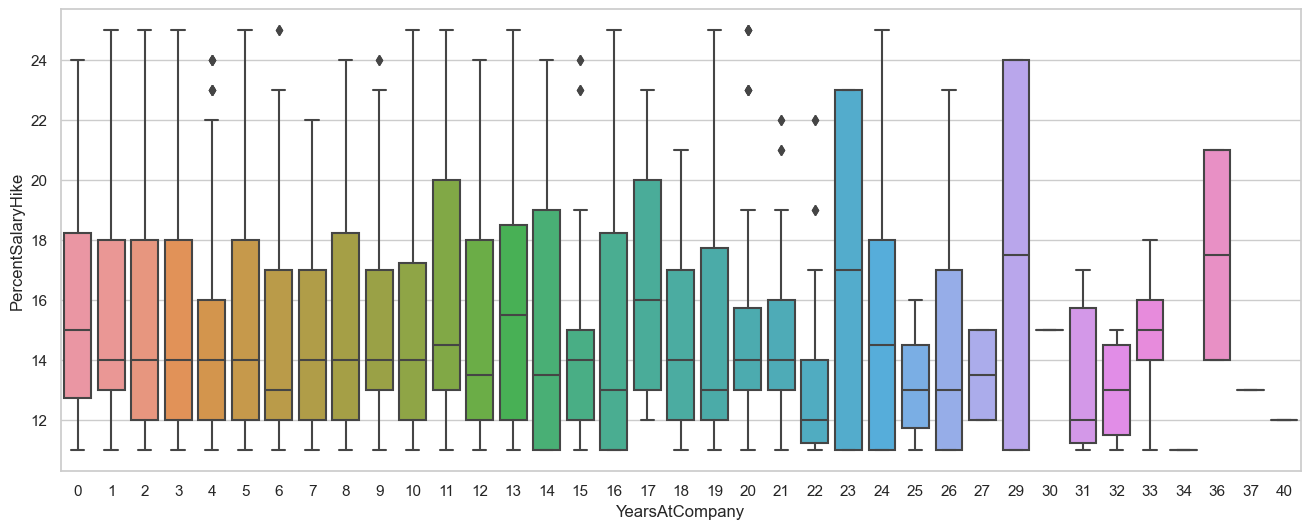

In [67]:
#Plotting hike% for No of years worked
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'YearsAtCompany', data = df)
plt.show()

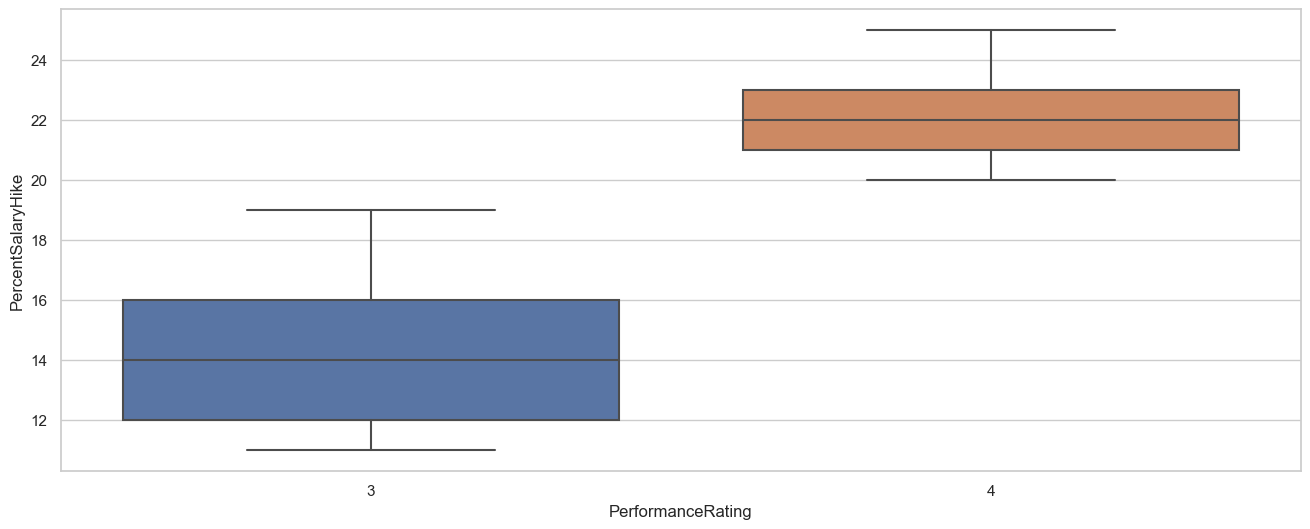

'employees with rating of 4 have got hikes between (20-25), whereas employees with rating of 3 have got between (11-19)'

In [68]:
#Plotting 'Performance rating' and 'hike%'
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'PerformanceRating', data = df)
plt.show()

#Insight 10
"""employees with rating of 4 have got hikes between (20-25), whereas employees with rating of 3 have got between (11-19)""" 

In [69]:
grp1 = df.groupby(['RelationshipSatisfaction', 'Attrition'])
grp1.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [70]:
count = grp1.get_group((1, 'Yes'))['Attrition'].count()
count

114

In [71]:
attrbyrelsat = pd.DataFrame(columns = ['Relsat', 'Attrition', 'Count', 'Attr%'])
attrbyrelsat

,Relsat,Attrition,Count,Attr%


In [72]:
attrbyrelsat.loc[len(attrbyrelsat)] = ['1', 'Yes', count, count/df['RelationshipSatisfaction'].value_counts()[1]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174


In [73]:
count = grp1.get_group((2, 'Yes'))['Attrition'].count()
attrbyrelsat.loc[len(attrbyrelsat)] = ['2', 'Yes', count,count/df['RelationshipSatisfaction'].value_counts()[2]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174
1,2,Yes,90,14.851485


In [74]:
count = grp1.get_group((3, 'Yes'))['Attrition'].count()
attrbyrelsat.loc[len(attrbyrelsat)] = ['3', 'Yes', count, count/df['RelationshipSatisfaction'].value_counts()[3]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174
1,2,Yes,90,14.851485
2,3,Yes,142,15.468410


In [75]:
count = grp1.get_group((4, 'Yes'))['Attrition'].count()
attrbyrelsat.loc[len(attrbyrelsat)] = ['4', 'Yes', count, count/df['RelationshipSatisfaction'].value_counts()[4]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174
1,2,Yes,90,14.851485
2,3,Yes,142,15.468410
3,4,Yes,128,14.814815


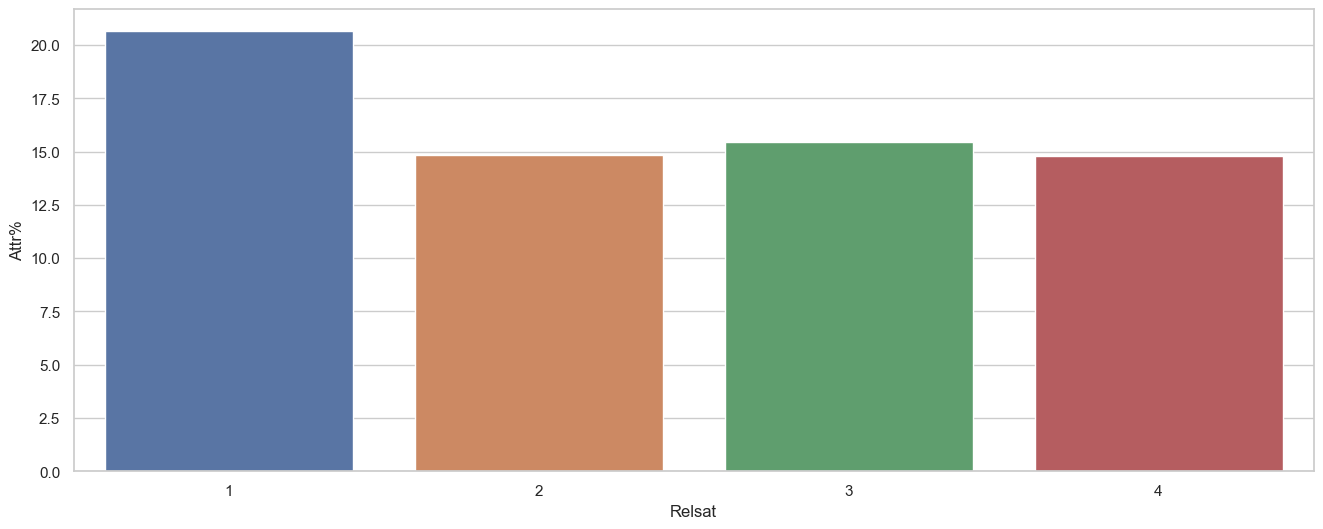

'employees with relation satisfaction of 1 have highest attrition numbers at 20.65%.'

In [76]:
plt.figure(figsize = (16,6))
sns.barplot(y = 'Attr%', x = 'Relsat', data = attrbyrelsat)
plt.show()

#Insight 11
"""employees with relation satisfaction of 1 have highest attrition numbers at 20.65%.""" 

## Data Preprocessing

In [77]:
#Checking for unwanted columns
print("EmployeeCount unique values::", df['EmployeeCount'].unique())
print("Over18 unique values::",df['Over18'].unique())
print("StandardHours unique values::",df['StandardHours'].unique())
#There is only one value for above column hence dropping it as they will not affect our model

EmployeeCount unique values:: [1]
Over18 unique values:: ['Y']
StandardHours unique values:: [80]


In [78]:
df.drop(columns = ['EmployeeCount', 'Over18','StandardHours', 'EmployeeNumber'], inplace = True)

In [79]:
df.shape

(2940, 33)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2940 non-null   int64  
 1   Attrition                 2940 non-null   object 
 2   BusinessTravel            2940 non-null   object 
 3   DailyRate                 2940 non-null   int64  
 4   Department                2940 non-null   object 
 5   DistanceFromHome          2940 non-null   int64  
 6   Education                 2940 non-null   int64  
 7   EducationField            2940 non-null   object 
 8   EnvironmentSatisfaction   2940 non-null   int64  
 9   Gender                    2940 non-null   object 
 10  HourlyRate                2940 non-null   int64  
 11  JobInvolvement            2940 non-null   int64  
 12  JobLevel                  2940 non-null   int64  
 13  JobRole                   2940 non-null   object 
 14  JobSatis

In [81]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [82]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cat_BusinessTravel,ord_Department
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,8,0,1,6,4,0,5,1.0,1.0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,1,10,3,3,10,7,1,7,2.0,2.0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,7,3,3,0,0,0,0,1.0,2.0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,0,8,3,3,8,7,3,0,2.0,2.0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,1,6,3,3,2,2,2,2,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,1,17,3,3,5,2,0,3,2.0,2.0
2936,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,9,5,3,7,7,1,7,1.0,2.0
2937,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,1,6,0,3,6,2,0,3,1.0,2.0
2938,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,0,17,3,2,9,6,0,8,2.0,1.0


In [83]:
int1 = []
obj1 = []

for i in df.columns:
    if df[i].dtypes == 'int64':
        int1.append(i)
    else:
        obj1.append(i)

In [84]:
obj1

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'cat_BusinessTravel',
 'ord_Department']

In [85]:
categorical_features = ['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'cat_BusinessTravel',
 'ord_Department']

In [87]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

In [88]:
y = df['Attrition'].astype(int)  # Target variable
X = df.drop(columns=['Attrition']).astype(int)  # Features

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)

In [90]:
# standardization 

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

X_standardized = standard_scaler.fit_transform(X)

In [93]:
#model training and prediction

models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("NB", GaussianNB()))
models.append(("RF", RandomForestClassifier()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s Accuracy: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    # Calculating training accuracy
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy for {name}: {train_accuracy}")
    print()

    # Calculating test accuracy
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {name}: {test_accuracy}")

    # Calculating additional metrics
    print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}")
    print()
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")
    print()
    print(f"Recall for {name}: {recall_score(y_test, y_pred)}")
    print()
    print(f"Precision for {name}: {precision_score(y_test, y_pred)}")
    print()
    print(f"ROC AUC for {name}: {roc_auc_score(y_test, y_pred)}")
    print("----------------------------------------------------------------------------")

LR Accuracy: 0.864803 (0.020923)
Training Accuracy for LR: 0.8703231292517006

Test Accuracy for LR: 0.8996598639455783
Confusion Matrix for LR:
[[496  10]
 [ 49  33]]

Classification Report for LR:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       506
           1       0.77      0.40      0.53        82

    accuracy                           0.90       588
   macro avg       0.84      0.69      0.74       588
weighted avg       0.89      0.90      0.89       588


Recall for LR: 0.4024390243902439

Precision for LR: 0.7674418604651163

ROC AUC for LR: 0.6913380892702208
----------------------------------------------------------------------------
LDA Accuracy: 0.859284 (0.022260)
Training Accuracy for LDA: 0.8647959183673469

Test Accuracy for LDA: 0.891156462585034
Confusion Matrix for LDA:
[[494  12]
 [ 52  30]]

Classification Report for LDA:
              precision    recall  f1-score   support

           0       0.90      0